## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

In [104]:
import numpy as np 
from sklearn.datasets import load_boston 
import pandas as pd 
from scipy.stats import nbinom,geom
from scipy import stats
from scipy.stats import norm
import seaborn as sns 
import matplotlib.pyplot as plt 

Answers:

    1. there are 506 samples with 13 attributes (with one missing that was added). the data type of each variable is 'pandas.core.frame.DataFrame'
    
    2. histogram - x axis show the nitric oxides concentration and y axis shows the number of houses.
    we can see that most houses (over 50) had concentration of 0.46 nitric oxides.It is a Poisson distribution,.
    boxplot- the median of nitric oxides concentration is around 0.55, half of the samples (the second and third quarters) 
    are between 0.45-0.62. It is noticeable by the boxplot that the left tail is longer than the right.  

    3. Most correlated features are presented in the table.
        Feature with unsual behaviour is "CHAS" which has almost no correlation with any of the features.
        
    4. The 2 features that correlated the most are "RAD" & "TAX" with correlation of 0.91
        Next in line are "NOX" & "DIS" with correlation of -0.77
        
    5. Done
    
    6. (a) As we go further from Boston employment centers, the NOX levels drop significantly
       (b) The effect of Black and the effect of Crime, on each and every single attribute, is completely opposite (despite CHAS)
       (c) There is a significant amount of elderly, especially around age 100
    

In [79]:
# 1
boston = load_boston()

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target

print(boston.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0.5, 0, 'Concentration')

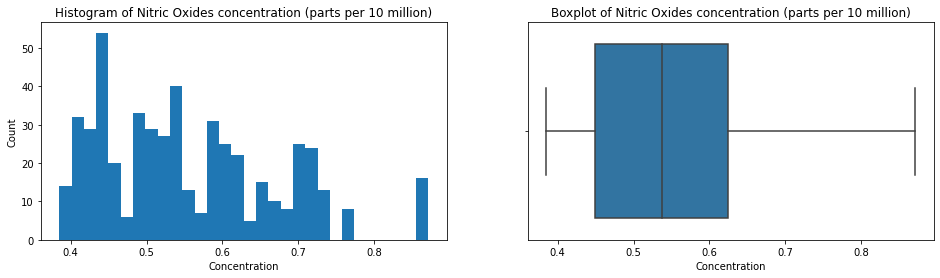

In [80]:
#2
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
## Part A
axes[0].hist(df["NOX"], bins = 30)
axes[0].set_title('Histogram of Nitric Oxides concentration (parts per 10 million)')
axes[0].set_xlabel('Concentration')
axes[0].set_ylabel('Count')

## Part B
NOX_box = sns.boxplot(x=df["NOX"], data=df)
axes[1] = NOX_box
axes[1].set_title('Boxplot of Nitric Oxides concentration (parts per 10 million)')
axes[1].set_xlabel('Concentration')


3.Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?

we do not have fully correlated (=1) features , but we can see that RAD and TAX correleation is very high . 
  CHAS does not look ok ***************88

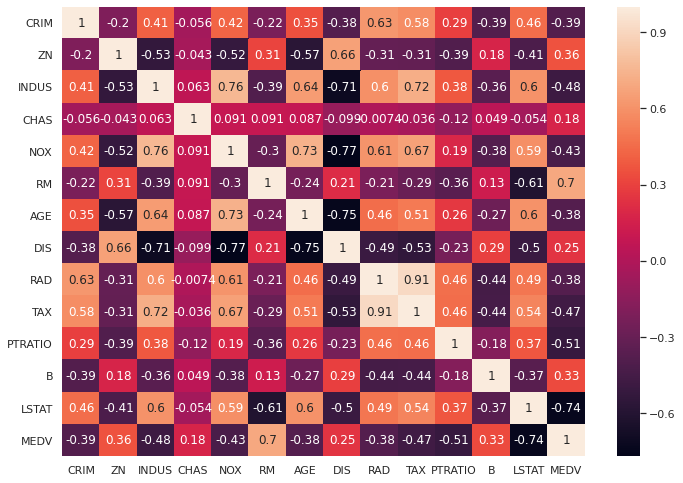

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

DIS    NOX     -0.769230
AGE    DIS     -0.747881
LSTAT  MEDV    -0.737663
DIS    INDUS   -0.708027
LSTAT  RM      -0.613808
       AGE      0.602339
       INDUS    0.603800
RAD    NOX      0.611441
       CRIM     0.625505
INDUS  AGE      0.644779
DIS    ZN       0.664408
TAX    NOX      0.668023
MEDV   RM       0.695360
INDUS  TAX      0.720760
AGE    NOX      0.731470
INDUS  NOX      0.763651
RAD    TAX      0.910228
CRIM   CRIM          NaN
dtype: float64

In [81]:
# 3
## Heatmap
df.corr(method = 'pearson')
corrMatrix = df.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corrMatrix, annot=True)
plt.show()

## Correlation table
corrMatrix = df.corr()
print(corrMatrix)

## Corr function to present the highest correlated
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = df.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened


## showing the most correlated featurs, with correlation higher than |0.6|

print("\n\n Highest correlarted features: ")
corrFilter(df, .6)

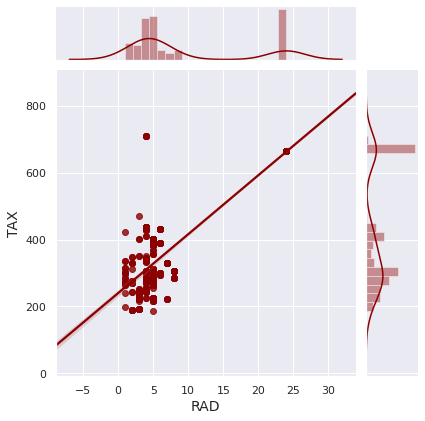

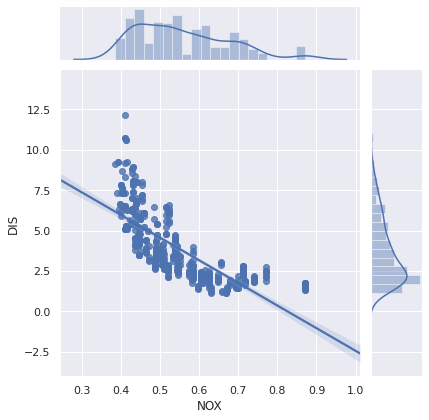

In [82]:
# 4
# Jointplot RAD & TAX
RAD_TAX = sns.jointplot(x=df["RAD"], y=df["TAX"],color="darkred",marginal_kws=dict(bins=20), kind="reg")
RAD_TAX.set_axis_labels('RAD', 'TAX', fontsize = 14)
plt.show()

# Jointplot NOX & DIS
NOX_INDUS = sns.jointplot(x=df["NOX"], y=df["DIS"],marginal_kws=dict(bins=20), kind="reg")
RAD_TAX.set_axis_labels('NOX', 'DIS', fontsize = 14)
plt.show()

5.Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)



[0.00197628 0.00395257 0.01383399 0.02173913 0.02766798 0.02766798
 0.03162055 0.03952569 0.04545455 0.06324111 0.06916996 0.08893281
 0.09486166 0.09683794 0.10079051 0.11264822 0.1284585  0.14624506
 0.16798419 0.1798419  0.19367589 0.20948617 0.2173913  0.22924901
 0.243083   0.24901186 0.26482213 0.27865613 0.28853755 0.29249012
 0.3083004  0.32806324 0.33201581 0.34189723 0.35968379 0.36758893
 0.38142292 0.38735178 0.40118577 0.41501976 0.42687747 0.44466403
 0.45454545 0.47035573 0.48221344 0.5        0.51383399 0.52766798
 0.54150198 0.56916996 0.59486166 0.61067194 0.64426877 0.66798419
 0.7055336  0.73517787 0.78063241 0.83201581 0.88932806 1.        ]
0.48666007905138337
0.10968379446640314


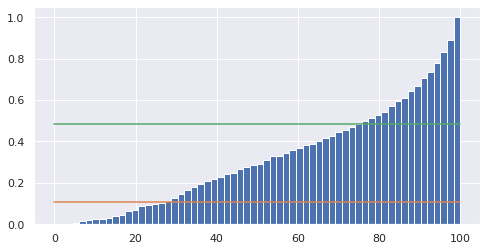

In [84]:
from scipy.stats import iqr
fig, ax = plt.subplots(figsize=(8, 4))
n, bins, patches = ax.hist(df['AGE'], 60, density=True, histtype='barstacked',
                           cumulative=True, label='Empirical')
print(n)
# sns.boxenplot(DF['AGE'])
# sns.boxplot(data=DF['AGE'])
# plt.axvline(, color='k', linestyle='dashed', linewidth=1)
q75, q25 = np.percentile(n, [75 ,25])
# print(DF['AGE'])
print(q75)
print(q25)

x_low = [0, 100]
y_low = [q25, q25]

plt.plot(x_low, y_low)
x_high = [0, 100]
y_high = [q75, q75]

plt.plot(x_high, y_high)


### Question 2 - Independence and conditional independence

#### 2.A
Can we define a three dimensional multivariate gaussian that is pairwise-independent but not collectivley independent?
If your anser is yes, provide an example.
If your answer is no, provide a proof.




$\displaystyle f_x(x_1,x_2,x_3) = \frac{1}{\sqrt{2 \pi {\begin{vmatrix} {\sigma_1^2} & 0 & 0\\ 0 & {\sigma_2^2} & 0 \\ 0 & 0 & {\sigma_3^2}\end{vmatrix}}}}\ e^{-\frac{1}{2}\  \displaystyle \left( \begin{array}{lllll}x_1-\mu_1 \\\ x_2-\mu_2 \\\ x_3-\mu_3 \\
\end{array}\right)^T \ \begin{vmatrix} {\sigma_1^2} & 0 & 0\\ 0 & {\sigma_2^2} & 0 \\ 0 & 0 & {\sigma_3^2}\end{vmatrix}^{-1} \displaystyle \left( \begin{array}{lllll}x_1-\mu_1 \\\ x_2-\mu_2 \\\ x_3-\mu_3 \\
\end{array}\right)\ \\ }$


We know that:


$(\displaystyle\sum )^ {-1} = \begin{vmatrix} {\sigma_1^2} & 0 & 0\\ 0 & {\sigma_2^2} & 0 \\ 0 & 0 & {\sigma_3^2}\end{vmatrix}^{-1} =\begin{vmatrix} \frac{1}{\sigma_1^2} & 0 & 0\\ 0 &  \frac{1}{\sigma_2^2} & 0 \\ 0 & 0 &  \frac{1}{\sigma_3^2}\end{vmatrix} \\ $

So: 



$\displaystyle f_x(x_1,x_2,x_3) = \frac{1}{\sqrt{2 \pi^{3}  {\begin{vmatrix} {\sigma_1^2} & 0 & 0\\ 0 & {\sigma_2^2} & 0 \\ 0 & 0 & {\sigma_3^2}\end{vmatrix}}}}\ e^{-\frac{1}{2}\ 
 (\frac{(x_1 -\mu_1)^2}{\sigma_1^2} + \frac{(x_2 -\mu_2)^2}{\sigma_2^2} +\frac{(x_3 -\mu_3)^2}{\sigma_3^2})\\ }$


$\begin{vmatrix} \displaystyle\sum  \end{vmatrix} = \begin{vmatrix} {\sigma_1^2} & 0 & 0\\ 0 & {\sigma_2^2} & 0 \\ 0 & 0 & {\sigma_3^2}\end{vmatrix} \ =\sigma_1^2 *\sigma_2^2* \sigma_3^2 $ 




$\displaystyle f_x(x_1,x_2,x_3) = \frac{1}{\sqrt{2 \pi^{3} * \sigma_1^2 *\sigma_2^2* \sigma_3^2   }}\ e^{-\frac{1}{2}\ 
 (\frac{(x_1 -\mu_1)^2}{\sigma_1^2} + \frac{(x_2 -\mu_2)^2}{\sigma_2^2} +\frac{(x_3 -\mu_3)^2}{\sigma_3^2})\\ }$
 
 
 
 
 

$\displaystyle f_x(x_1,x_2,x_3) = \frac{1}{\sqrt{2 \pi  \sigma_1^2 * 2 \pi \sigma_2^2* 2 \pi \sigma_3^2   }}\ e^{-\frac{1}{2}\ 
 (\frac{(x_1 -\mu_1)^2}{\sigma_1^2} + \frac{(x_2 -\mu_2)^2}{\sigma_2^2} +\frac{(x_3 -\mu_3)^2}{\sigma_3^2})\\ }$
 
 
 
 
$\displaystyle f_x(x_1,x_2,x_3) = \frac{ e^ \frac{-(x_1 -\mu_1)^2}{2 \sigma_1^2}}{\sqrt{2 \pi  \sigma_1^2  }}\ \frac{ e^ \frac{-(x_2 -\mu_2)^2}{2 \sigma_2^2}}{\sqrt{2 \pi  \sigma_2^2  }}\ \frac{ e^ \frac{-(x_3 -\mu_3)^2}{2 \sigma_3^2}}{\sqrt{2 \pi  \sigma_3^2  }} = f_1(x)f_2(x)f_3(x) $
 
 
 
 and we prove that $f_1(x), f_2(x),f_3(x) $ are not collectivley independent

#### 2.B
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

the answer is :n*m*k-1

explanation :  first' we know that sum of probability =1 in this case , so if we know that the sum of probabilities it is 1 that it is enough to know n*m*k probabilities -1 , because we know to calculate the last probability ourselves by substract from 1 all the probabilities that we have .

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

the answer is : n+m+k-3

explanation : P(X=x,Y=y,Z=z)= P(X=x)*P(Y=y)*P(Z=z)=n+m+k-3

#### 2.D
For the same random variables from the previous section, how many parameters define the joint distribution of $\ 
X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

answer is: $kn+km-k-1$

explanation :

$P(X=x,Y=y,Z=z)= P(X,Y|Z) P(Z)= P(X|Z) P(Y|Z) P(Z)$


1.  $P(Z)= (K-1)$   - because we know that the sum of P(Z) probabilitied is 1 - we ned to know (k-1) and we can calculate the rest by 1- sum_of_prbabilities(k-1)

2.  $P(Y|Z)= k(m-1)$ 

3.  $P(X|Z)= k(n-1)$



$P(X=x,Y=y,Z=z)= P(X,Y|Z) P(Z)= P(X|Z) P(Y|Z) P(Z)= k(n-1)+k(m-1)+(k-1)= kn+km-k-1$

#### 2.E
For the random variables from the previous section, let $n=m=2$ and $k=2$. Give and example for a joint distribution of $\ X, Y \ $ and $Z$ where $X$ and $Y$ are conditionaly independent given $Z$?

we want to show here that X and Y are independent and  X and Y conditionaly independent given  𝑍.

X and Y two independent bernulli with p=0.5.

lets defind Z=XOR(X,Y)
Ω={0,1}^3

so the joint probability mass function :

X   Y   Z

0   0   0   0.25

0   1   1   0.25

1   0   1   0.25

1   1   0   0.25


1. we can see that X,Y,Z are not collectively independent bacause we have cases here that if we are multipling the probability of X,Y and Z and we are getting 0, and in other cases we are getting 0.25.
in order for it to be collectively independent we need to get the same probability for the probabilitieds of X,Y,Z.


X,Y,Z are independent because from the table we can see that we have different walues when we are comparing columns X and Z , and Y and Z.


we can see that are conditionally independent in Z , because Z have a function (XOR) that give a results for the combination of X and Y .



### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD.xlsx
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3\ \ $. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

In [85]:
# settings
names = ['index','numbers']
df = pd.read_csv('GMD_2021.csv',  names=names)
df = df['numbers']
df_to_array = df.to_numpy()
df_GMM = df_to_array.reshape(-1, 1)



In [86]:
# sanity check

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, covariance_type='spherical', precisions_init = (3,3,3))
gmm.fit(df_GMM)

for i in range(len(gmm.means_)):
    print(f'variables of ({i+1}) are: mean:{gmm.means_[i]}, std:{round(np.sqrt(gmm.covariances_[i]),2)}')


variables of (1) are: mean:[4.08381061], std:0.47
variables of (2) are: mean:[15.10397806], std:1.5
variables of (3) are: mean:[8.99841881], std:0.53


#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

1. Observation - By observing the data, the mean of the 3rd one looks aroung 15.
2. EM

In [89]:
#EM algorithm

import math
import random
# function to calculte each point in the correct gaussian distribution
def normpdf(x, mean, sd):
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom


# Set the data as given
m1 = 4
m2 = 9
m3 = random.uniform(df_GMM.min(), df_GMM.max())

s1 = .5
s2 = .5
s3 = 1.5
w2 = .25

eps=0.000005
while True :
    w3_old=w3
    w1_old=w1
    m3_old=m3
    r3_sum = 0
    r3_lst = []
    # E-step:
    for x in df_GMM:
        p1 = normpdf(x,m1,s1)
        p2 = normpdf(x,m2,s2)
        p3 = normpdf(x,m3,s3)
        
        r1 = p1/(p1+p2+p3)
        r2 = p2/(p1+p2+p3)
        r3 = p3/(p1+p2+p3)
        
        r3_sum += r3
        r3_lst.append(r3)
    
    w3 = r3_sum / len(df_GMM)
    w1 = 1-(w2+w3)
   
    
    # M-step:
    temp_sum = 0
    for i in range(len(df_GMM)):
        temp = r3_lst[i]*df_GMM[i]
        temp_sum += temp
        m3 = temp_sum/(w3*len(df_GMM))
    if(abs(m3_old-m3)<eps and abs(w3_old-w3)<eps and abs(w1_old-w1)<eps ):
        break
         
print(f'variables of (1) are: mean:{m1}, std:{s1}, wheight:{round(w1,2)}')
print(f'variables of (2) are: mean:{m2}, std:{s2}, wheight:{w2}')
print(f'variables of (3) are: mean:{round(m3[0],4)}, std:{s3}, wheight:{round(w3,2)}')

variables of (1) are: mean:4, std:0.5, wheight:0.13
variables of (2) are: mean:9, std:0.5, wheight:0.25
variables of (3) are: mean:15.1079, std:1.5, wheight:0.62


#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

we have two y-axis that showing the count of samples and the probabilities , x-axis showing the range (min to max )of our values .

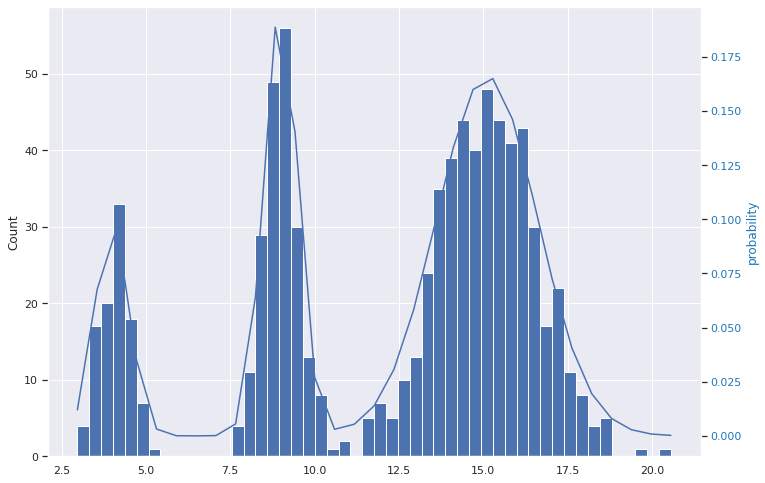

In [98]:
from scipy.stats import norm
count, x1, ignored = plt.hist(df_to_array, 30,density=True)
plt.close()
fig, ax1 = plt.subplots()
ax1.hist(df_to_array,bins=50)
color = 'tab:blue'
ax2 = ax1.twinx()

ax2.set_ylabel('Prob', color=color)  
ax1.set_ylabel('Count')  
ax2.tick_params(axis='y', labelcolor=color)
g1=(norm.pdf(x1,m1,s1))
g2=(norm.pdf(x1,m2,s2))
g3=(norm.pdf(x1,m3,s3))

g=w1*g1+w2*g2+w3*g3
plt.plot(x1,g)
plt.ylabel('probability')

plt.grid()
plt.show()


#### 3.C
Describe two ways for generating data for a GMD random variable with:
* centers at  $\mu_1+3, \mu_2+5, mu_3+7$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$

2 ways of generating data for GMM random variables:
    first:
        1. Generate a random variable U∼Uniform(0,1)
        2. If U ∈ [sigma (p_k), sigma(p_k+1)) interval, 
            where p_k correspond to the the probability of the k_th component of the mixture model, 
            then generate from the distribution of the k_th component
        3. Repeat steps (1) and (2) until the desired amount of samples from the mixture distribution
    second:
        1. For each distribution out of the 3, take randomly n/3 samples
        2. add them together to the same data set

#### 3.D
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


In [90]:
# settings
new_m1 = m1 + 3
new_m2 = m2 + 5
new_m3 = m3.item() + 7
new_s1 = new_s2 = new_s3 = 1
new_w1 = new_w2 = new_w3 = 1/3
ms = [new_m1,new_m2,new_m3]
sigmas = [new_s1, new_s2, new_s3]
ws = [new_w1, new_w2, new_w3]

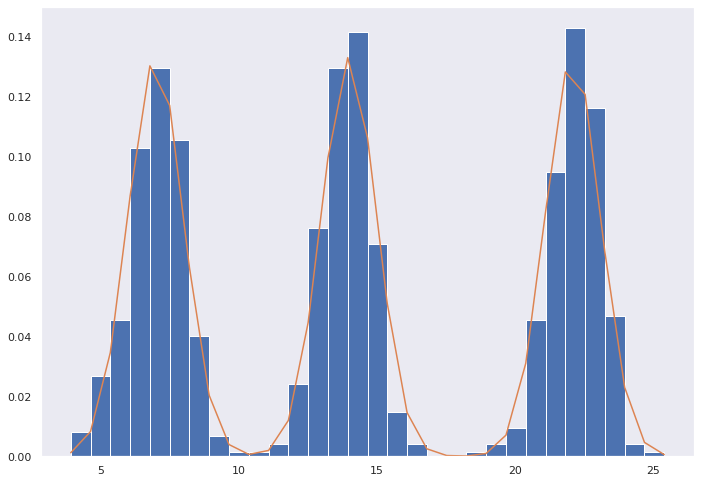

In [91]:


def gen_GMM2(N,n_comp, ms,sigmas,ws):
    #set ranges
    all_x = []
    ranges = []
    for i in ws:
        if i==ws[0]:
            ranges.append(i)
        elif i==ws[-1]:
            ranges.append(1)
        else:
            temp = sum(ranges)+i
            ranges.append(temp)
    
    for x in range(N):
        U = random.uniform(0,1)
        for i in range(len(ranges)):
            if U <= ranges[i]:
                s = np.random.normal(ms[i], sigmas[i], 1)
                s = s.item()
                all_x.append(s)
    return all_x 
                



synthetic_data2 = np.array(gen_GMM2(1000,3, ms,sigmas,ws))



count, x2, ignored = plt.hist(synthetic_data2, 30,density=True)
new_g1=(norm.pdf(x2,new_m1,new_s1))
new_g2=(norm.pdf(x2,new_m2,new_s2))
new_g3=(norm.pdf(x2,new_m3,new_s3))

g_new=new_w1*new_g1+new_w2*new_g2+new_w3*new_g3
plt.plot(x2,g_new)


plt.grid()
plt.show()

#### 3.E - BONUS
Use the other one to generate 1000 more points and draw two comparative histograms.


In [92]:
# settings
n_m1 = m1 + 3
n_m2 = m2 + 5
n_m3 = m3.item() + 7
n_s1 = n_s2 = n_s3 = 1
n_w1 = n_w2 = n_w3 = 1/3
ms = [n_m1,n_m2,n_m3]
sigmas = [n_s1, n_s2, n_s3]
ws = [n_w1, n_w2, n_w3]

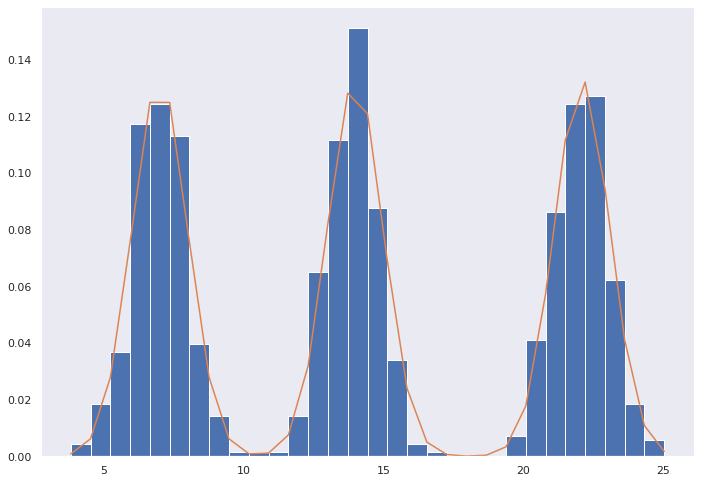

In [93]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns



p1=random.normal(size=333, loc=n_m1,scale=n_s1)
p2=random.normal(size=333, loc=n_m2,scale=n_s2)
p3=random.normal(size=334, loc=n_m3,scale=n_s3)

p_join=np.append(np.append(p1,p2),p3)

count, x3, ignored = plt.hist(p_join, 30,density=True)
g1_3=(norm.pdf(x3,n_m1,n_s1))
g2_3=(norm.pdf(x3,n_m2,n_s2))
g3_3=(norm.pdf(x3,n_m3,n_s3))

g_n_3=n_w1*g1_3+n_w2*g2_3+n_w3*g3_3
plt.plot(x3,g_n_3)
plt.grid()
plt.show()

### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 70,000 RCU and a standard deviation of 30,000 RCU.

In [100]:
#settings
mean = 70_000
std = 30_000

#### 4.A
What percent of people earn less than 50,000 RCU?

In [105]:
import scipy.stats as st
k0 = 50_000

norm_dist_A = stats.norm(loc=mean, scale=std)
P_A = norm_dist_A.cdf(k0)
print(f'The percent of people earn less than 50,000 RCU is {round(P_A*100,2)}%')



The percent of people earn less than 50,000 RCU is 25.25%


#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

In [107]:
k1 = 45_000
k2 = 65_000
z_score1 = (k1-mean)/std
z_score2 = (k2-mean)/std
p_value1 = stats.norm.sf(abs(z_score1))
p_value2 = stats.norm.sf(abs(z_score2))

final_per = p_value2 - p_value1
print(f'The percent of people earn between 45,000 RCU and 65,000 RCU is {round(final_per*100,2)}%')



The percent of people earn between 45,000 RCU and 65,000 RCU is 23.15%


#### 4.C
What percent of people earn more than 70,000 RCU?

If 70K RCU is the mean, and the distribution is normal, it means that half of the population is greater than 70K.
Thus, the % of people earn more than 70K RCU = 50%

#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

In [108]:
n = 1_000
k3 = 140_000
z_score3 = (k3-mean)/std
p_value3 = stats.norm.sf(abs(z_score3))

print(f'The expect amount of employees in the company to earn more than 140,000 RCU is {math.ceil(p_value3*n)}')

## also works ##

# P_D = 1-norm_dist_A.cdf(k3)
# P_D*n

The expect amount of employees in the company to earn more than 140,000 RCU is 10


#### 4.E
A survey is performed on employees of the company. The employees are split into 20 groups of 50 employees each.
What is the probability that more than 10 groups have an average salary between 50,000 RCU and 70,000 RCU?

In [109]:
# calculating P regarding general group of 20 people

mean_E = 70_000
std_E = 30_000/math.sqrt(50)

d1 = 70_000
d2 = 50_000

norm_dist_E = stats.norm(loc=mean_E, scale=std_E)
P_a_group = norm_dist_E.cdf(d1) - norm_dist_E.cdf(d2)

# using binomial dist.

P_E = stats.binom.sf(10, 20, P_a_group)

print(f'The probability to have more than 10 groups with average earn 50K to 70K is {round(P_E,2)}')

The probability to have more than 10 groups with average earn 50K to 70K is 0.41


### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

In [110]:
def CC_E(n):
    temp_sum = 0
    # Harmonic sum
    for i in range(1,n+1):
        temp_var = 1/i
        temp_sum += temp_var
    expected_mean = n * temp_sum
    return expected_mean



#### 5.B
Write code to compute the exact value of $V(T_{N})$

In [111]:
def CC_V(n):
    var = 0
    for i in range(1,n+1):
        p_i = (n-i+1)/n
        var += (1-p_i)/(p_i**2)
    return var


#### 5.C
Write code to exactly compute $P(T_{20}>40)$

In [113]:
N=20
n=40

X_prob = np.arange(1,41)

p=1
x1=geom(1).pmf( X_prob)

for i in range(2, N+1):
    p=(N-i+1)/N
    x2=geom(p).pmf(X_prob)

    x1=np.convolve(x1,x2)

#  now we need only convolution of 20-40 , because we have T= x1,x2,...,x20.
# so we need to sum only the part we want 


total =np.sum(x1[:(n-N+1)])

#  in this part we calculate T20<=40, but we want T20>40 , so we need to 1- total that we got .
print(f' T20 >40 = 1- T20<=40 =  1- total = {1-total}')

 T20 >40 = 1- T20<=40 =  1- total = 0.9641122736925725


#### 5.D
Use Chebicheff to provide a bound for the probability from C and compare the results

$P(\mu-b \sigma \leq T_N \leq \mu +b \sigma) \geq 1- \frac{1}{b^{2}}$

let's define   $k=\mu - b \sigma$

$b\sigma = \mu-k $ 

$b= \frac {\mu - k }{\sigma}$

b>0 because $b=1.3425 $

$\mu + b \sigma = \mu +(\frac{\mu - k}{\sigma})* \sigma =2*\mu -k$


$P(k \leq T_N \leq 2\mu -k ) \geq 1- \frac{1}{b^{2}}$



$P(k \leq T_N \leq 2\mu -k ) \geq 1- \frac{\sigma ^{}2}{(\mu -k )^{2}}$

from calculation below :

$P(k \leq T_N \leq 2\mu -k ) \geq 1- \frac{\sigma ^{}2}{(\mu -k )^{2}}$




because  chevichevs inquality insist that $P(T_N)\geq k $ then we need to use higher k.

because in the previous section we calculated $P(T_{20})>40 $ let choose $P(T_{20}) \geq 41 $ 

and we got : $1- \frac{\sigma ^{}2}{(\mu -k )^{2}} =0.408$

 $P(T_{20})>40 =0.96 >= 0.408$ 

In [114]:
bound= 1-(CC_V(20)/np.power((CC_E(20)-41),2))
print(bound)

0.40877586469077654
